## Jupiter and Trojans

In [9]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('presentation-Copy1.mplstyle')

names = ['Jupiter', 'Trojan 1','Trojan 2']

#state vectors
w_0 = [0, 0, 0, 0, 0, 0] 
w_1 = [0, 5.2, 0, -2.75674, 0, 0]
w_2 = [-4.503, 2.6, 0, -1.38, -2.39, 0]
w_3 = [4.503, 2.6, 0,  -1.38, 2.39, 0]
W = np.array([w_0, w_1, w_2, w_3])

Mass = [1, 0.001, 0, 0]
particles = len(W)
G = 4*np.pi**2

# Time properties
low = 0.01
high = 10
step = 0.01
def Energy(w, mass, low, high, dt):
    t = np.arange(low, high, step)
    Elisttime = [] #List of E = T + U at ALL time steps
    for k in range(len(t)):
        Elist = [] #Ei = Ti + Ui at ONE time step
        for i in range(particles):
            Ulist = []
            xi = w[k][i][0:3] # positions values
            vi = w[k][i][3:6] # velocity values
            Ti = [(1/2)*mass[i]*(vi[x])**2 for x in range(3)] # kinetic energies
            Ti = np.sum(Ti)
            for j in range(particles):
                if i != j:
                    xj = w[k][j][0:3]
                    rad = [xj[x] - xi[x] for x in range(3)]
                    absrad = ((rad[0])**2 + rad[1]**2 + rad[2]**2)**(0.5)
                    Uij = (G/2) * (mass[j] * mass[i])/(absrad) # potential energy
                    Ulist.append(Uij)
            Ui = sum(Ulist)
            Ei = Ti + Ui # total energy
            Elist.append(Ei)
        Ek = sum(Elist)
        Elisttime.append(Ek)
    return Elisttime

def Force(xi, xj, mass_j):
    '''A function calculating the acceleration on each particle at each timestep dt'''
    rad = [(xi[i] - xj[i]) for i in range(3)]
    absrad = ((rad[0])**2 + (rad[1])**2 + (rad[2])**2)**(0.5)
    f = [-G * ((mass_j)*(rad[i]))/((absrad)**3) for i in range(3)]
    return f

def g(wl):
    '''Calculating the g_l(W) formula. Outputs an array of velocities and accelerations on each body'''
    ww = np.zeros((4, 6)) # Generate array
    for i in range(particles): 
        wa = wl[i][0:3] # positions
        va = wl[i][3:6] # velocities
        flist = [[],[],[]]
        for j in range(particles):
            if j!= i:
                F = np.nan_to_num(Force(wa, wl[j][0:3], Mass[j])) # acceleration from previous function
                for x in range(3):
                    flist[x].append(F[x])
        fan = [np.sum(flist[x]) for x in range(3)]  # sum acceleration
        out = [va[0],va[1],va[2]]
        out[len(fan):] = fan # add the velocities to matrix
        ww[i] = out  # Create array with velocities and accelerations

    return ww
print(g(W))

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.46000065e-03  0.00000000e+00]
 [-2.75674000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.46000065e+00  0.00000000e+00]
 [-1.38000000e+00 -2.39000000e+00  0.00000000e+00  1.26577873e+00
  -7.29391343e-01  0.00000000e+00]
 [-1.38000000e+00  2.39000000e+00  0.00000000e+00 -1.26577873e+00
  -7.29391343e-01  0.00000000e+00]]


Jupitermax amplitude: 1.2152764092832058e-06
Jupitermin amplitude: -6.300293273753255e-07
Jmean: 5.200000630222006
T1max amplitude: 0.0010120363843633129
T1min amplitude: -0.0005311996014079057
T1mean: 5.200244023255633
T2max amplitude: 0.000987235523637331
T2min amplitude: -0.0005053597675317434
T2mean: 5.200217644932664
total amp: 0.0015437744748636462
Totmean: 5.200154099470102
None


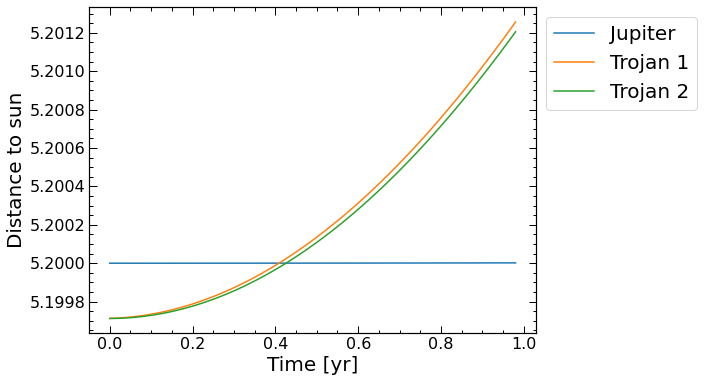

In [10]:
def rungekutta(wl,dt, low, high, distance = True, orbit = False, energy = False):
    '''A function defining the Runge-kutta integrator.
    set:
    ----------------
    distance = True to plot distance of each body to sun
    orbit = True to plot the orbits of each body
    energy = True to plot total energy of system.
    ----------------
    '''
    
    t = np.arange(low, high, dt)
    W_a = np.zeros((len(t), len(wl), 6)) # Create array
    W_a[0] = wl  # Set initial values of array to state vector
    distlist = np.zeros((len(t)-1, particles-1)) # List of distances for each particle to the sun
    for i in range(1, len(t)):
        fa = g(wl)
        wb = wl + fa*dt/2
        fb = g(wb)
        wc = wl + (dt/2)*fb
        fc = g(wc)
        wd = wl + (dt)*fc
        fd = g(wd)
        www = wl + (dt/6)*fa + (dt/3)*fb + (dt/3)*fc + (dt/6)*fd
        W_a[i] = www - www[0]  # remove the sun
        wl = www  # update array
        
        '''Calculate distance to sun in each timestep'''  
        dist_sun = [np.sqrt(W_a[i,k,0]**2 + W_a[i,k,1]**2 + W_a[i,k,2]**2) for k in range(1,len(W))]
        distlist[i-1] = dist_sun
        
    '''Plot distance to sun'''
    timelist = np.arange(low, high-dt, dt)
    
    if distance:
        for k in range(len(W)-1):
            plt.xlabel('Time [yr]')
            plt.ylabel('Distance to sun')
            plt.plot(timelist,distlist[:,k], label = '{}'.format(names[k]))
            plt.legend(bbox_to_anchor=(1,1))
            
    '''Plot orbits of the bodies'''
    if orbit:
        for i in range(len(W)):
            plt.axis('equal')
            plt.plot(W_a[:,i][:,0], W_a[:,i][:,1])

    '''Plot total energy of system'''
    m = Mass
    EEE = Energy(W_a, m, low, high, dt)
    if energy:
        plt.plot(t,EEE)
        plt.ylabel('Total energy')
        plt.xlabel('Time [yr]')
    
    '''Distance properties'''
    print('Jupitermax amplitude:', distlist[:,0].max() - distlist[:,0].mean())
    print('Jupitermin amplitude:', distlist[:,0].min() - distlist[:,0].mean())
    print('Jmean:', distlist[:,0].mean())
    print('T1max amplitude:', distlist[:,1].max() - distlist[:,1].mean())
    print('T1min amplitude:', distlist[:,1].min() - distlist[:,1].mean())
    print('T1mean:', distlist[:,1].mean())
    print('T2max amplitude:', distlist[:,2].max() - distlist[:,2].mean())
    print('T2min amplitude:', distlist[:,2].min() - distlist[:,2].mean())
    print('T2mean:', distlist[:,2].mean())
    print('total amp:', distlist.max() - distlist.min())
    print('Totmean:', distlist.mean())
    
    plt.savefig('distsun.png', dpi = 300, bbox_inches = 'tight')
    return 
#W_a = rungekutta(W,0.01)
print(rungekutta(W,0.01, 0, 1))

### 

## Solar system

In [13]:
from astropy . coordinates import solar_system_ephemeris , EarthLocation
from astropy . coordinates import get_body_barycentric , get_body , get_moon ,get_body_barycentric_posvel
from astropy . time import Time

'''Import planets positions and velocities '''

planets = ['earth',
           'mercury',
 'venus',
 'mars',
 'jupiter',
 'saturn',
 'uranus',
 'neptune']

'''Insert values in lists'''
pl = []
t = Time("2021-02-01 15:48")
for i in planets:
    pos = get_body_barycentric_posvel(i,time = t, ephemeris='builtin')  
    pl.append(pos)
Masslist = []
xvals = []
yvals = []
zvals = []
vxvals = []
vyvals = []
vzvals = []
for j in range(len(planets)):
    xvals.append(pl[j][0].x.value)
    yvals.append(pl[j][0].y.value)
    zvals.append(pl[j][0].z.value)
    vxvals.append(pl[j][1].x.value*365)
    vyvals.append(pl[j][1].y.value*365)
    vzvals.append(pl[j][1].z.value*365)

'''Create state vectors'''
w_sun = [0, 0, 0, 0, 0, 0]
w_earth = [xvals[0],yvals[0],zvals[0],vxvals[0],vyvals[0],vzvals[0]]
w_merc = [xvals[1],yvals[1],zvals[1],vxvals[1],vyvals[1],vzvals[1]]
w_ven = [xvals[2],yvals[2],zvals[2],vxvals[2],vyvals[2],vzvals[2]]
w_mars = [xvals[3],yvals[3],zvals[3],vxvals[3],vyvals[3],vzvals[3]]
w_jup = [xvals[4],yvals[4],zvals[4],vxvals[4],vyvals[4],vzvals[4]]
w_sat = [xvals[5],yvals[5],zvals[5],vxvals[5],vyvals[5],vzvals[5]]
w_ura = [xvals[6],yvals[6],zvals[6],vxvals[6],vyvals[6],vzvals[6]]
w_nep = [xvals[7],yvals[7],zvals[7],vxvals[7],vyvals[7],vzvals[7]]
#w_x = [4.6, -39.9, 0, 0.06324, 1.338, 0]
W = np.array([w_sun, w_earth, w_merc, w_ven, w_mars, w_jup, w_sat, w_ura, w_nep])
msun, mearth, mmerc, mven, mmars, mjup, msat, mura, mnep = [
    1, #sun
    1/333030, # Earth
    1.651e-7, # Mercury
    0.000002447, # Venus
    0.0000003213, # Mars
    0.000954588, # Jupyter
    0.0002857, # Saturn
    0.00004365, # Uranus
    0.00005149 # Neptune,

]

Mass = [msun, mearth, mmerc, mven, mmars, mjup, msat, mura, mnep]

Particles = len(W) #Can remove this by looking at length of W matrix

### The following cells have the same properties as for the Jupiter and Trojan calculations, else, the specifics are commented.

In [14]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

G = 4*np.pi**2
particles = len(W)

def Force(xi, xj, mass_j):
    rad = [(xi[i] - xj[i]) for i in range(3)]
    absrad = ((rad[0])**2 + (rad[1])**2 + (rad[2])**2)**(0.5)
    f = [-G * ((mass_j)*(rad[i]))/((absrad)**3) for i in range(3)]
    return f


def g(wl):
    ww = np.zeros((len(W), 6)) 
    for i in range(particles): 
        wa = wl[i][0:3]
        va = wl[i][3:6]
        flist = [[],[],[]]
        for j in range(particles):
            if j!= i:
                F = np.nan_to_num(Force(wa, wl[j][0:3], Mass[j]))
                for x in range(3):
                    flist[x].append(F[x])
        fan = [np.sum(flist[x]) for x in range(3)]
        out = [va[0],va[1],va[2]]
        out[len(fan):] = fan 
        ww[i] = out 

    return ww
ww = g(W)
print(g(W))

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  9.42560541e-04
  -1.13860486e-03 -5.10763370e-04]
 [-4.71822316e+00 -3.93022952e+00 -1.70357696e+00  2.71233698e+01
  -2.68869978e+01 -1.16603531e+01]
 [-1.21837382e+01 -1.65255522e+00  3.80145358e-01  7.25063022e+01
  -3.34774860e+02 -1.84979687e+02]
 [ 7.16402062e+00  1.56118008e+00  2.49151008e-01 -1.54892517e+01
   6.75130242e+01  3.14000020e+01]
 [-4.86819211e+00  9.83929647e-01  5.82742701e-01 -2.16638092e+00
  -1.47318247e+01 -6.69661340e+00]
 [ 2.09455231e+00  1.74445904e+00  6.96796376e-01 -9.71740684e-01
   1.07947542e+00  4.86352294e-01]
 [ 1.56503190e+00  1.07788431e+00  3.77683997e-01 -2.24415691e-01
   3.00785149e-01  1.33905823e-01]
 [-9.21887544e-01  9.48397903e-01  4.28481832e-01 -7.80992873e-02
  -5.93076618e-02 -2.48693941e-02]
 [ 1.85338365e-01  1.05021896e+00  4.25224157e-01 -4.35172798e-02
   6.59928197e-03  3.78414132e-03]]


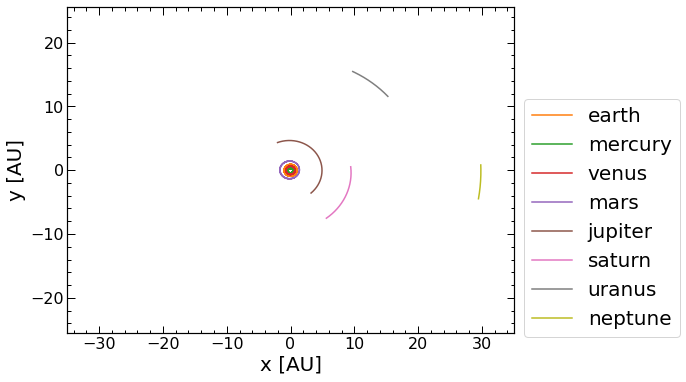

In [15]:
def rungekutta(wl,dt, solar = True, oscillation = False):
    t0 = 0
    tn = 5
    t = np.arange(t0, tn+dt, dt)
    W_a = np.zeros((len(t), W.shape[0], W.shape[1]))
    W_a[0] = wl
    distlist = np.zeros((len(t)-1, particles-1))
    zlist = np.zeros((len(t)-1, particles-1))
    for i in range(1, len(t)):
        fa = g(wl)
        wb = wl + fa*dt/2
        fb = g(wb)
        wc = wl + (dt/2)*fb
        fc = g(wc)
        wd = wl + (dt)*fc
        fd = g(wd)
        www = wl + (dt/6)*fa + (dt/3)*fb + (dt/3)*fc + (dt/6)*fd
        W_a[i] = www - www[0]
        wl = www
        
        '''Calculate distance to sun in each timestep'''  
        dist_sun = [np.sqrt(W_a[i,k,0]**2 + W_a[i,k,1]**2 + W_a[i,k,2]**2) for k in range(1,len(W))]
        distlist[i-1] = dist_sun
        
        '''Calculate  vertical distance w.r.t plane of sun'''
        zval = [W_a[i,k,2] for k in range(1,len(W))]
        zlist[i-1] = zval
        
    timelist = np.arange(t0, tn, dt)
        
    '''Plots orbits if True'''
    if solar:
        for i in range(len(W)):
            if i == 0:
                plt.axis('equal')
                plt.xlim(-35,35)
                plt.ylim(-35,35)
                plt.xlabel('x [AU]')
                plt.ylabel('y [AU]')
                plt.plot(W_a[:,0][:,0], W_a[:,i][:,0])
            else:
                plt.plot(W_a[:,i][:,0], W_a[:,i][:,1], label = '{}'.format(planets[i-1]))
                plt.legend(bbox_to_anchor = (1,0.75))
                
    '''Plots distance to sun and vertical distances if True'''
    if oscillation:   
        fig = plt.figure(figsize = (15, 15))
        plt.subplot(221)
        for k in range(len(W)-1):
            plt.title(r'Suns mass = {} $M_\odot$'.format(Mass[0]))
            plt.ylabel('Distance from sun [AU]')
            plt.xlabel('Time [yr]')
            plt.plot(timelist,distlist[:,k])

        plt.subplot(222)
        for k in range(len(W)-1):
            plt.title(r'Suns mass = {} $M_\odot$'.format(Mass[0]))
            plt.ylabel('Vertical distance from plane [AU]')
            plt.xlabel('Time [yr]')
            plt.plot(timelist,zlist[:,k], label = '{}'.format(planets[k]))
            plt.legend(bbox_to_anchor = (1,1))
    plt.savefig('solsys.png', dpi = 300, bbox_inches = 'tight') 
    return 
rungekutta(W,0.01)

## Including planet x

### These have the exact same properties as the code cells above, but including one more planet (planet X). If changes have been made, they are explicitly commented.

In [6]:
from astropy . coordinates import solar_system_ephemeris , EarthLocation
from astropy . coordinates import get_body_barycentric , get_body , get_moon ,get_body_barycentric_posvel
from astropy . time import Time

planets = ['earth',
           'mercury',
 'venus',
 'mars',
 'jupiter',
 'saturn',
 'uranus',
 'neptune']

kk = ['earth',
           'mercury',
 'venus',
 'mars',
 'jupiter',
 'saturn',
 'uranus',
 'neptune',
     'Planet x']

pl = []
t = Time("2021-02-01 15:48")
for i in planets:
    pos = get_body_barycentric_posvel(i,time = t, ephemeris='builtin')  
    pl.append(pos)
Masslist = []
xvals = []
yvals = []
zvals = []
vxvals = []
vyvals = []
vzvals = []
for j in range(len(planets)):
    xvals.append(pl[j][0].x.value)
    yvals.append(pl[j][0].y.value)
    zvals.append(pl[j][0].z.value)
    vxvals.append(pl[j][1].x.value*365)
    vyvals.append(pl[j][1].y.value*365)
    vzvals.append(pl[j][1].z.value*365)

w_sun = [0, 0, 0, 0, 0, 0]
w_earth = [xvals[0],yvals[0],zvals[0],vxvals[0],vyvals[0],vzvals[0]]
w_merc = [xvals[1],yvals[1],zvals[1],vxvals[1],vyvals[1],vzvals[1]]
w_ven = [xvals[2],yvals[2],zvals[2],vxvals[2],vyvals[2],vzvals[2]]
w_mars = [xvals[3],yvals[3],zvals[3],vxvals[3],vyvals[3],vzvals[3]]
w_jup = [xvals[4],yvals[4],zvals[4],vxvals[4],vyvals[4],vzvals[4]]
w_sat = [xvals[5],yvals[5],zvals[5],vxvals[5],vyvals[5],vzvals[5]]
w_ura = [xvals[6],yvals[6],zvals[6],vxvals[6],vyvals[6],vzvals[6]]
w_nep = [xvals[7],yvals[7],zvals[7],vxvals[7],vyvals[7],vzvals[7]]
w_x = [4.6, -39.9, 0, 0.06324, 1.338, 0]
W = np.array([w_sun, w_earth, w_merc, w_ven, w_mars, w_jup, w_sat, w_ura, w_nep, w_x])
msun, mearth, mmerc, mven, mmars, mjup, msat, mura, mnep, mx = [
    1, #sun
    1/333030, # Earth
    1.651e-7, # Mercury
    0.000002447, # Venus
    0.0000003213, # Mars
    0.000954588, # Jupyter
    0.0002857, # Saturn
    0.00004365, # Uranus
    0.00005149, # Neptune,
    0.000954588
]

Mass = [msun, mearth, mmerc, mven, mmars, mjup, msat, mura, mnep, mx]

Particles = len(W) #Can remove this by looking at length of W matrix
np.around(vzvals,5)

array([-1.70358,  0.38015,  0.24915,  0.58274,  0.6968 ,  0.37768,
        0.42848,  0.42522])

In [7]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
period = 11*u.year

G = 4*np.pi**2
particles = len(W)

tn = 300 # Change number of years of simulation here!
def Energy(w, mass, dt):
    t0 = 0
    t = np.arange(t0, tn+dt, dt)
    Elisttime = [] #List of E = T + U at ALL time steps
    for k in range(len(t)):
        Elist = [] #Ei = Ti + Ui at ONE time step
        for i in range(particles):
            Ulist = []
            xi = w[k][i][0:3]
            vi = w[k][i][3:6]
            Ti = [(1/2)*mass[i]*(vi[x])**2 for x in range(3)]
            Ti = np.sum(Ti)
            for j in range(particles):
                if i != j:
                    xj = w[k][j][0:3]
                    rad = [xj[x] - xi[x] for x in range(3)]
                    absrad = ((rad[0])**2 + rad[1]**2 + rad[2]**2)**(0.5)
                    Uij = (G/2) * (mass[j] * mass[i])/(absrad)
                    Ulist.append(Uij)
            Ui = sum(Ulist)
            Ei = Ti + Ui
            Elist.append(Ei)
        Ek = sum(Elist)
        Elisttime.append(Ek)
    return Elisttime

def Force(xi, xj, mass_j):
    rad = [(xi[i] - xj[i]) for i in range(3)]
    absrad = ((rad[0])**2 + (rad[1])**2 + (rad[2])**2)**(0.5)
    f = [-G * ((mass_j)*(rad[i]))/((absrad)**3) for i in range(3)]
    return f


def g(wl):
    ww = np.zeros((len(W), 6)) # change to 3,6 without sun # To 4,6 with sun
    for i in range(particles): #add 1,particles for no sun # only particles with sun
        wa = wl[i][0:3]
        va = wl[i][3:6]
        flist = [[],[],[]]
        for j in range(particles):
            if j!= i:
                F = np.nan_to_num(Force(wa, wl[j][0:3], Mass[j]))
                for x in range(3):
                    flist[x].append(F[x])
        fan = [np.sum(flist[x]) for x in range(3)]
        out = [va[0],va[1],va[2]]
        out[len(fan):] = fan # add the velocities to matrix
        ww[i] = out #add -1 for no sun

    return ww
ww = g(W)
print(g(W))

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  9.45236092e-04
  -1.16181236e-03 -5.10763370e-04]
 [-4.71822316e+00 -3.93022952e+00 -1.70357696e+00  2.71233727e+01
  -2.68870201e+01 -1.16603532e+01]
 [-1.21837382e+01 -1.65255522e+00  3.80145358e-01  7.25063049e+01
  -3.34774883e+02 -1.84979687e+02]
 [ 7.16402062e+00  1.56118008e+00  2.49151008e-01 -1.54892490e+01
   6.75130002e+01  3.14000021e+01]
 [-4.86819211e+00  9.83929647e-01  5.82742701e-01 -2.16637861e+00
  -1.47318464e+01 -6.69661374e+00]
 [ 2.09455231e+00  1.74445904e+00  6.96796376e-01 -9.71739605e-01
   1.07944700e+00  4.86353556e-01]
 [ 1.56503190e+00  1.07788431e+00  3.77683997e-01 -2.24416804e-01
   3.00749813e-01  1.33909480e-01]
 [-9.21887544e-01  9.48397903e-01  4.28481832e-01 -7.81020173e-02
  -5.93208438e-02 -2.48706376e-02]
 [ 1.85338365e-01  1.05021896e+00  4.25224157e-01 -4.35287779e-02
   6.58290521e-03  3.78532739e-03]
 [ 6.32400000e-02  1.33800000e+00  0.00000000e+00 -2.80285254e-03
   2.43521614e-02 -2.3627

In [8]:
def rungekutta(wl,dt, solar = False, oscillation = False):
    t0 = 0
    t = np.arange(t0, tn+dt, dt)
    W_a = np.zeros((len(t), W.shape[0], W.shape[1]))
    W_a[0] = wl
    distlist = np.zeros((len(t)-1, particles-1))
    zlist = np.zeros((len(t)-1, particles-1))
    for i in range(1, len(t)):
        fa = g(wl)
        wb = wl + fa*dt/2
        fb = g(wb)
        wc = wl + (dt/2)*fb
        fc = g(wc)
        wd = wl + (dt)*fc
        fd = g(wd)
        www = wl + (dt/6)*fa + (dt/3)*fb + (dt/3)*fc + (dt/6)*fd
        W_a[i] = www - www[0]
        wl = www
        
        '''Calculate distance to sun in each timestep'''  
        dist_sun = [np.sqrt(W_a[i,k,0]**2 + W_a[i,k,1]**2 + W_a[i,k,2]**2) for k in range(1,len(W))]
        distlist[i-1] = dist_sun
        
        zval = [W_a[i,k,2] for k in range(1,len(W))]
        zlist[i-1] = zval
        
    timelist = np.arange(t0, tn, dt)
    
    if solar:
        for i in range(len(W)):
            if i == 0:
                plt.axis('equal')
                plt.xlim(-50,50)
                plt.ylim(-50,50)
                plt.xlabel('x [AU]')
                plt.ylabel('y [AU]')
                plt.plot(W_a[:,0][:,0], W_a[:,0][:,1])
            else:
                plt.plot(W_a[:,i][:,0], W_a[:,i][:,1], label = '{}'.format(kk[i-1]))
                plt.legend(bbox_to_anchor = (1,1))

    if oscillation:   
        fig = plt.figure(figsize = (15, 15))
        plt.subplot(221)
        for k in range(len(W)-1):
            plt.title(r'Suns mass = {} $M_\odot$'.format(Mass[0]))
            plt.ylabel('Distance from sun [AU]')
            plt.xlabel('Time [yr]')
            plt.ylim(-5,100)
            plt.plot(timelist,distlist[:,k])

        plt.subplot(222)
        for k in range(len(W)-1):
            plt.title(r'Suns mass = {} $M_\odot$'.format(Mass[0]))
            plt.ylabel('Vertical distance from plane [AU]')
            plt.xlabel('Time [yr]')
            plt.ylim(-16,16)
            plt.plot(timelist,zlist[:,k], label = '{}'.format(kk[k]))
            plt.legend(bbox_to_anchor = (1,1))
        fig.subplots_adjust(wspace = 0.3)
        
    m = Mass
    EEE = Energy(W_a, m, dt)
    plt.ylabel(r'$E_{\rm{Tot}}$ [AU$^2$ $M_\odot$ / year$^2$]')
    plt.xlabel('Time [yr]')
    plt.plot(t,EEE)
    plt.savefig('energy1.png', dpi = 300, bbox_inches = 'tight')
    return 
rungekutta(W,0.01)

KeyboardInterrupt: 

0.022520818536099885